In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### loading the dataset. and first look at the data

In [2]:
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [5]:
data['shop_id'].nunique()

100

#### just the thought that in September 2017 someone might not have bought sneakers and maybe among the lost we could find something interesting. since we have a dataset with users from 607 to 999, let's check if everyone got there, we do not take numbers from 1 to 607 and above 999, since such a hypothesis is too far-fetched than the one that if there are no numbers between the number 607 and 999

In [6]:
user_id = data['user_id'].to_numpy()
user_ids = np.linspace(607, 999, 393)

In [7]:
missed_ids = np.setxor1d(user_id, user_ids)
missed_ids = pd.DataFrame(missed_ids, columns=['user_id'])
missed_ids.head(5)

,user_id
0,608.0
1,609.0
2,610.0
3,611.0
4,612.0


In [8]:
data['price_per_item'] = data['order_amount'] / data['total_items']
data.describe()

,order_id,shop_id,user_id,order_amount,total_items,price_per_item
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720,387.742800
std,1443.520003,29.006118,87.798982,41282.539349,116.32032,2441.963725
min,1.000000,1.000000,607.000000,90.000000,1.00000,90.000000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000,133.000000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000,153.000000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000,169.000000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000,25725.000000


#### When you are working with big datasets and hundreds/ths/mlns values, visualization can help a lot

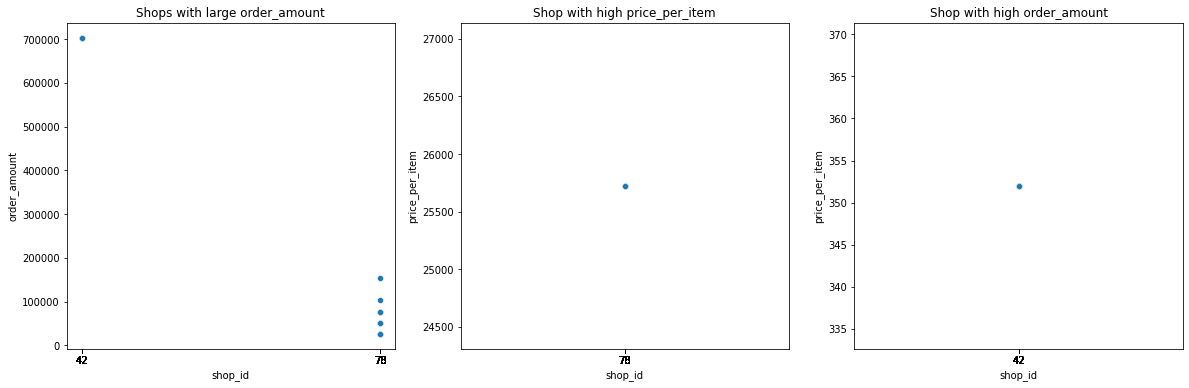

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
ax1 = sns.scatterplot(y=data['order_amount'], x=data['shop_id'][data['order_amount']>3145], ax=ax[0])
ax1.set_xticks(data['shop_id'][data['order_amount']>3145])
ax1.set_title('Shops with large order_amount')
# plt.xticks(data['shop_id'][data['order_amount']>3145]);
ax2 = sns.scatterplot(y=data['price_per_item'], x=data['shop_id'][data['price_per_item']>500], ax=ax[1])
ax2.set_xticks(data['shop_id'][data['price_per_item']>500]);
ax2.set_title('Shop with high price_per_item')
# plt.xticks(data['shop_id'][data['price_per_item']>500]);
ax3 = sns.scatterplot(y=data['price_per_item'], x=data['shop_id'][data['order_amount']>700000], ax=ax[2])
ax3.set_xticks(data['shop_id'][data['shop_id'] == 42])
ax3.set_title('Shop with high order_amount');

#### looking at №42 more precisely

In [25]:
data[(data['shop_id'] == 42) & (data['order_amount'] > 700000)].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item,date
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,2017-03-07
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0,2017-03-04
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0,2017-03-02
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0,2017-03-24
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0,2017-03-15


In [11]:
store_42 = pd.pivot_table(index=[data['order_amount'], data['user_id'], data['shop_id']], data=data[['price_per_item', 'total_items', 'order_amount']][(data['shop_id'] == 42) & (data['order_amount'] > 5000)], 
               aggfunc={'price_per_item':'mean',
                       'total_items':'mean',
                       'order_amount':'count'})
store_42

,,,order_amount,price_per_item,total_items
order_amount,user_id,shop_id,,,
704000,607,42,17,352.0,2000


#### looking at №78 more precisely

In [12]:
store_78 = pd.pivot_table(index=[data['price_per_item'], data['user_id']], data=data[['order_amount', 'total_items']][(data['shop_id'] == 78) & (data['price_per_item'] > 500)], 
               aggfunc='sum')
users = []
for i in range(len(store_78)):
    users.append(store_78.index[i][1])

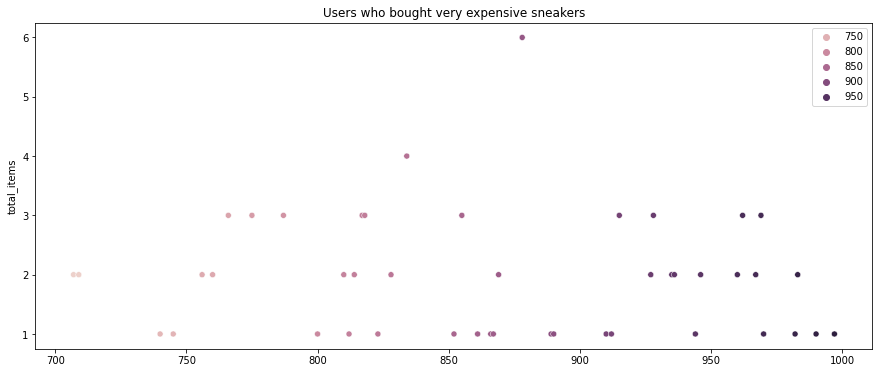

In [13]:
fig, ax = plt.subplots(figsize=(15,6))
sns.scatterplot(x=users, y=store_78['total_items'], hue=users);
plt.title('Users who bought very expensive sneakers');

#### another thought is about payment method, payments with credit_card or debit will cause no issue, but big amounts of cash can, so let's check for our store with biggest order_amount

In [14]:
payment_method = pd.pivot_table(index=[data['shop_id'], data['payment_method']], data=data[['order_amount', 'total_items']][data['order_amount'] > 5000], 
               aggfunc='sum')
payment_method

order_amount  total_items
shop_id payment_method                           
42      credit_card         11968000        34000
78      cash                  694575           27
        credit_card           463050           18
        debit                1106175           43

#### AOV without shops 78 and 42(because our hypotheses found that these two shops can give significant misstatement to AOV)

In [15]:
aov = data['order_amount'][(data['shop_id'] != 78) & (data['shop_id'] != 42)].mean()
print(f'AOV without shops №42 and №78 = {aov}')

AOV without shops №42 and №78 = 300.1558229655313


#### trying to define AOV by total_items

In [16]:
data['total_items'].unique()

array([   2,    1,    3, 2000,    4,    5,    6,    8], dtype=int64)

In [17]:
totalItems_group = data.groupby(by=data['total_items'])['order_amount'].mean().rename_axis('Total Items in Order').reset_index(name='AOV')
standard_deviation = data.groupby(by=data['total_items'])['order_amount'].std().rename_axis('Total Items in Order').reset_index(name='std')['std']
median =  data.groupby(by=data['total_items'])['order_amount'].median().rename_axis('Total Items in Order').reset_index(name='Median')['Median']
totalItems_group['Median Order Value'] = median
totalItems_group['Standard Deviation'] = standard_deviation
totalItems_group

,Total Items in Order,AOV,Median Order Value,Standard Deviation
0,1,417.364481,153.0,2593.090627
1,2,750.215066,306.0,4760.572162
2,3,1191.076514,459.0,7471.160149
3,4,947.686007,592.0,5977.632918
4,5,759.350649,765.0,161.174453
5,6,17940.000000,948.0,51153.864136
6,8,1064.000000,1064.0,NaN
7,2000,704000.000000,704000.0,0.000000


#### looks good, but smth wrong with std, , knowing that shop 78 has sneakers price of 25725, we shoould exclude it from our metrics, because it will cause significant misstatement to AOV 

In [18]:
totalItems_group_wo78 = data.groupby(by=data['total_items'][data['shop_id'] != 78])['order_amount'].mean().rename_axis('Total Items in Order').reset_index(name='AOV')
standard_deviation_wo78 = data.groupby(by=data['total_items'][data['shop_id'] != 78])['order_amount'].std().rename_axis('Total Items in Order').reset_index(name='std')['std']
median_wo78 =  data.groupby(by=data['total_items'][data['shop_id'] != 78])['order_amount'].median().rename_axis('Total Items in Order').reset_index(name='Median')['Median']
totalItems_group_wo78['Median Order Value'] = median_wo78
totalItems_group_wo78['Standard Deviation'] = standard_deviation_wo78
totalItems_group_wo78


,Total Items in Order,AOV,Median Order Value,Standard Deviation
0,1.0,151.850911,153.0,30.564358
1,2.0,303.520925,306.0,58.407721
2,3.0,457.326180,459.0,75.814367
3,4.0,598.534247,592.0,115.777198
4,5.0,759.350649,765.0,161.174453
5,6.0,888.750000,882.0,115.520870
6,8.0,1064.000000,1064.0,NaN
7,2000.0,704000.000000,704000.0,0.000000


In [19]:
#### what else could we propose due to our research

In [20]:
payment_method_shop = data.groupby(by=data['payment_method'][data['shop_id'] == 5])['order_amount'].sum().rename_axis('payment_method').reset_index(name='order_amount')
payment_method_shop

,payment_method,order_amount
0,cash,6106
1,credit_card,3834
2,debit,3124


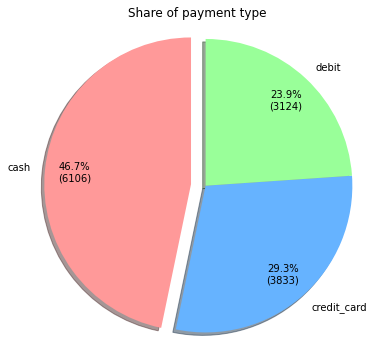

In [21]:
import matplotlib.pyplot as plt

labels = payment_method_shop['payment_method']
sizes = payment_method_shop['order_amount']
explode = (0.1, 0, 0)

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig1, ax1 = plt.subplots(figsize=(6, 6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, sizes), pctdistance=0.8,
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Share of payment type')
plt.show()

In [22]:
shop_metrics = pd.pivot_table(index=data['shop_id'][data['shop_id'] == 5], data=data[['order_amount', 'price_per_item', 'total_items', 'user_id']],
                              aggfunc={'order_amount':'mean',
                                       'price_per_item':'mean',
                                       'total_items': 'sum',
                                      'user_id': 'nunique'})
shop_metrics.columns = ['avg_order_amount', 'avg_price_per_item', 'total_items', 'unique_users']
shop_metrics['average_item_purchase'] = shop_metrics['total_items']/shop_metrics['unique_users']
shop_metrics

,avg_order_amount,avg_price_per_item,total_items,unique_users,average_item_purchase
shop_id,,,,,
5.0,290.311111,142.0,92,44,2.090909


#### another thought in my head was about days, probably in some days(like weekend as an example) people buy more sneakers, so let's check this hypothesis. (looking ahead, our data didn't show us any proof of it)

In [26]:
data['date'] = pd.to_datetime(data['created_at']).dt.date
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,price_per_item,date
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,2017-03-13
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,2017-03-03
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,2017-03-14
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,2017-03-26
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,2017-03-01


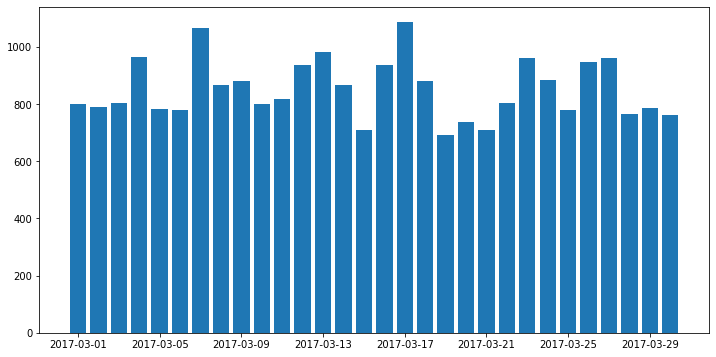

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(data['date'][(data['shop_id'] != 42) & (data['shop_id'] != 78)], 
       data['order_amount'][(data['shop_id'] != 42) & (data['shop_id'] != 78)]);